# Realce no Domínio da Frequência

Inclusão dos pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

1) Abra uma imagem monocromática e plote a mesma em tons de cinza.

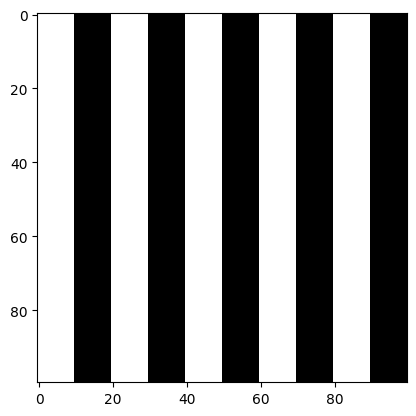

In [2]:
img = cv2.imread('ronchi.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

2) Calcule a Transformada de Fourier da imagem e plote as imagens referentes às partes real e imaginária.

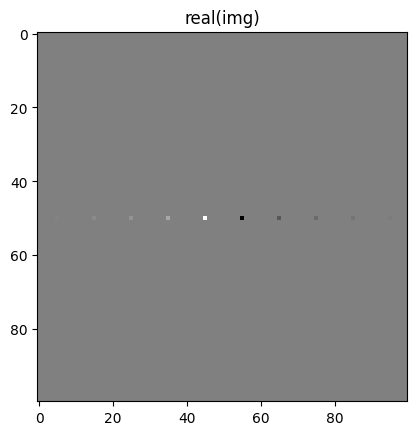

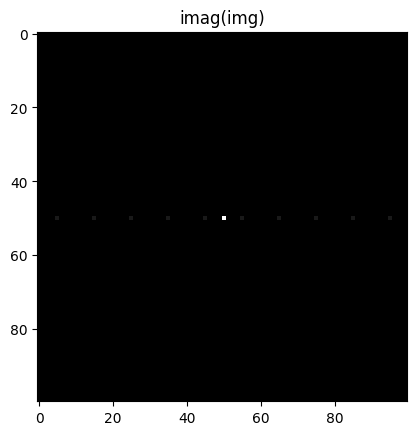

In [20]:
img32 = np.float32(img)/255
dft = cv2.dft(img32, flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

real = dft_shift[:,:,0]

imag = dft_shift[:,:,1]

plt.title('real(img)')
plt.imshow(real, cmap='gray')
plt.show()

plt.title('imag(img)')
plt.imshow(imag, cmap='gray')
plt.show()

3) Plote as imagens referentes à magnitude e fase.

C:\Users\witch\AppData\Local\Temp\ipykernel_2772\3552374819.py:1: RuntimeWarning: divide by zero encountered in log10
  mag = 20*np.log10(cv2.magnitude(real, imag))


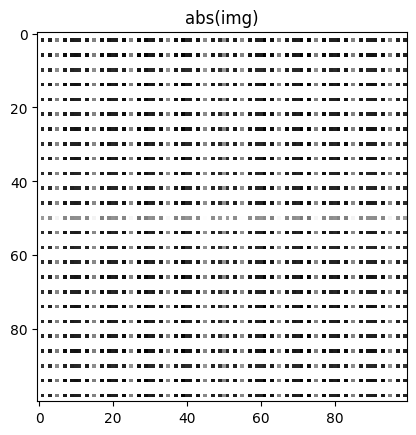

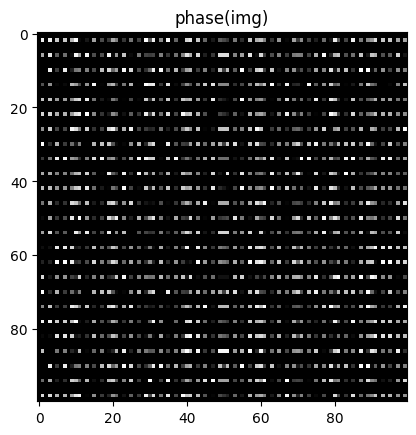

In [21]:
mag = 20*np.log10(cv2.magnitude(real, imag))

phase = cv2.phase(real, imag)

plt.title('abs(img)')
plt.imshow(mag, cmap='gray')
plt.show()

plt.title('phase(img)')
plt.imshow(phase, cmap='gray')
plt.show()

4) Aplique uma máscara que executa a filtragem **Passa-Baixas** na Transformada da imagem original e plote a **magnitude** da imagem resultante (no dominio da frequencia).

C:\Users\witch\AppData\Local\Temp\ipykernel_2772\2856671615.py:26: RuntimeWarning: divide by zero encountered in log10
  mag = 20*np.log10(cv2.magnitude(real, imag))


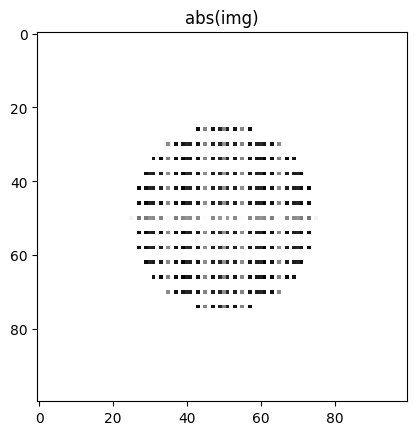

In [45]:
def createMask(h, w, center=None, radius=None, invert=False):

    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1]) / 2

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    if not invert:
        mask = dist_from_center <= radius
    else:
        mask = dist_from_center >= radius
    return mask

# mask = np.zeros((100,100,2), np.uint8)
# mask[50-20:50+21, 50-20:50+21] = 1

mask = createMask(img.shape[0], img.shape[1])
mask = np.repeat(mask[:, :, np.newaxis], 2, axis=2)

fshift = dft_shift * mask

real = fshift[:,:,0]
imag = fshift[:,:,1]
mag = 20*np.log10(cv2.magnitude(real, imag))

plt.title('abs(img)')
plt.imshow(mag, cmap='gray')
plt.show()

5) Calcule a Transformada de Fourier Inversa e plote a imagem filtrada (no domínio do espaço).

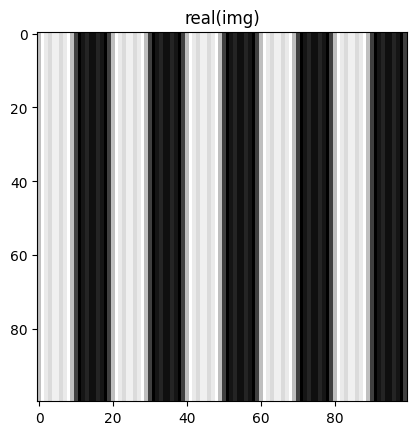

In [46]:
f_ishift = np.fft.ifftshift(fshift)

img_back = cv2.idft(f_ishift)

real = img_back[:,:,0]

plt.title('real(img)')
plt.imshow(real, cmap='gray')
plt.show()

6) Aplique uma máscara que executa a filtragem **Passa-Altas** na Transformada da imagem original e plote a magnitude da imagem resultante (no dominio da frequencia).

C:\Users\witch\AppData\Local\Temp\ipykernel_2772\1282951136.py:11: RuntimeWarning: divide by zero encountered in log10
  mag = 20*np.log10(cv2.magnitude(real, imag))


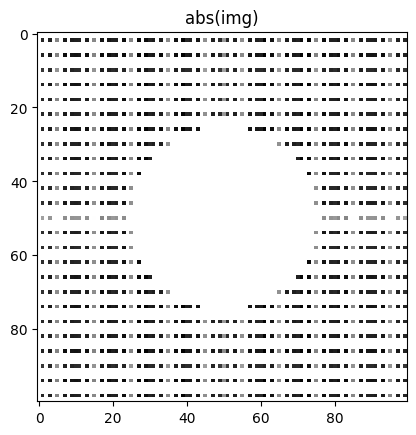

In [47]:
# mask = np.ones((100,100,2), np.uint8)
# mask[50-20:50+21, 50-20:50+21] = 0

mask = createMask(img.shape[0], img.shape[1], invert=True)
mask = np.repeat(mask[:, :, np.newaxis], 2, axis=2)

fshift = dft_shift * mask

real = fshift[:,:,0]
imag = fshift[:,:,1]
mag = 20*np.log10(cv2.magnitude(real, imag))

plt.title('abs(img)')
plt.imshow(mag, cmap='gray')
plt.show()

7) Calcule a Transformada de Fourier Inversa e plote a imagem fitrada (no dominio do espaço).

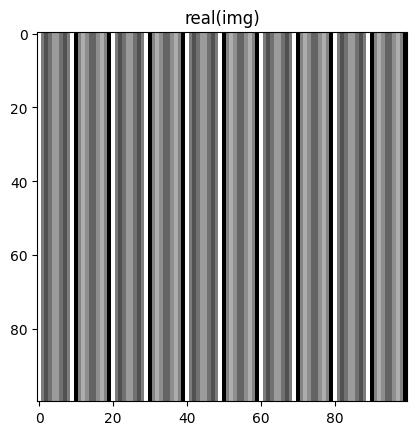

In [48]:
f_ishift = np.fft.ifftshift(fshift)

img_back = cv2.idft(f_ishift)

real = img_back[:,:,0]

plt.title('real(img)')
plt.imshow(real, cmap='gray')
plt.show()

---

<h1>Equipe</h1>

**Aluno 1**: Fabricio Bertoncello Filho (26648849)

**Aluno 2**: Bruno Dalagnol (25766201)

**Aluno 3**: Lucas Guimarães Moreira (26681307)

**Aluno 4**: Renato Leal de Araujo (26723573)
